In [341]:
# Answer 1
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [342]:
# Answer 2
# Upload the excel and convert it to dataframe
bank_df = pd.read_excel('bank-full.xlsx')

In [343]:
# Confirming that the data is loaded correctly
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [344]:
# Answer 3a
bank_df.shape

(45211, 17)

In [345]:
# The dataset has 45211 rows (entries) and 17 columns (attributes).

In [346]:
# Answer 3b
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [347]:
# There are quite a lot of attributes as objects/strings which need to be handled.

In [348]:
# Answer 3c
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [349]:
# There are no missing values or null values in the dataset.

In [350]:
# Answer 3d
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [351]:
# Age is slightly skewed to the right as mean > median. Looking at the difference between quartiles, we can say that there
# are more people with higher age than with lower age.

# Balance is heavily suffered by outliers to the right, and is also has a very wide range.

# Day is almost normally distributed, mean ~ median, data in 2nd quartile is more than in 3rd, which suggests that the last
# contact made is more likely to be in the first few days of the month.

# Duration has a long tail on the right as mean >> median, it suggests that there are quite a few clients with whom the call
# duration was high.

# Campaign has a long tail on the right as min = 1 but max = 63, and 3rd quartile is at 3, which suggests that the number
# of contacts performed during this campaign for this client is low for most clients.

# Pdays also has a long tail on the right which suggests that number of days that passed by after the client was last
# contacted from a previous campaign is low for most clients.

# Previous also has a long tail on the right, it suggests that number of contacts performed before this campaign is low for
# most clients.

In [352]:
# Answer 3e
# Checking the number of outliers in all columns
numeric_columns = bank_df.select_dtypes('number').columns
def numOfOutliers():
    for col_name in numeric_columns:
        q1 = bank_df[col_name].quantile(0.25)
        q3 = bank_df[col_name].quantile(0.75)
        iqr = q3-q1    # Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = bank_df.loc[(bank_df[col_name] < fence_low) | (bank_df[col_name] > fence_high)]
        print(col_name + " -> " + str(df_out.shape[0]))
        
numOfOutliers()

age -> 487
balance -> 4729
day -> 0
duration -> 3235
campaign -> 3064
pdays -> 8257
previous -> 8257


In [353]:
# Answer 4
# Encoding the columns with categorical values
for feature in bank_df.columns: 
    if bank_df[feature].dtype == 'object': 
        bank_df[feature] = pd.Categorical(bank_df[feature]).codes

In [354]:
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [355]:
# Confirming that all datatypes are now numerics
bank_df.dtypes

age          int64
job           int8
marital       int8
education     int8
default       int8
balance      int64
housing       int8
loan          int8
contact       int8
day          int64
month         int8
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome      int8
Target        int8
dtype: object

In [356]:
# Replacing unknown by NaN
bank_df = bank_df.replace('unknown', np.nan)
# Replacing -1 by NaN as it has no signifance
bank_df['pdays'] = bank_df['pdays'].replace(-1, np.nan)

In [358]:
# Replacing the NaN by mode (most frequently occuring values)
for column in ['job','education','poutcome','pdays','contact']:
    bank_df[column].fillna(bank_df[column].mode()[0], inplace=True)

In [359]:
# Checking that there are no more NaNs now
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

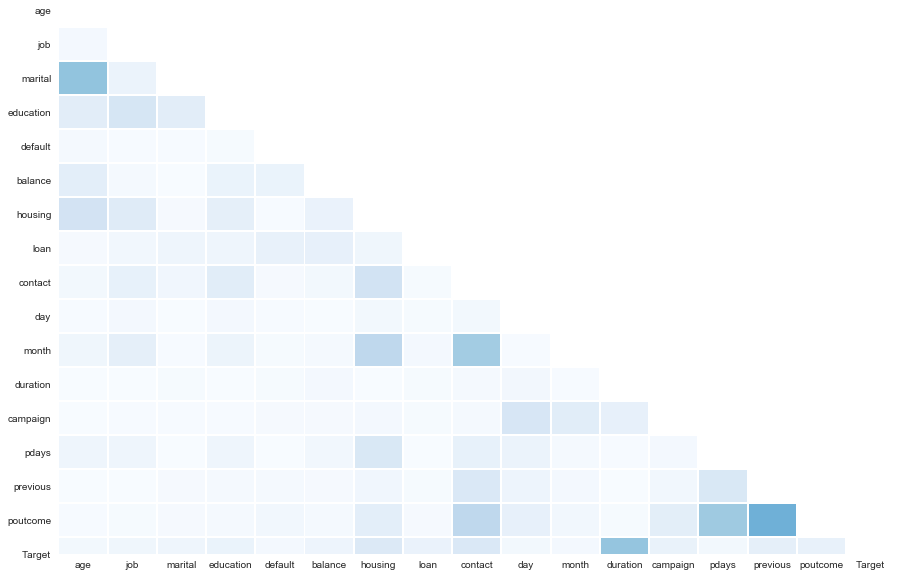

In [360]:
# A function to plot the correlation between each pair of attributes
def correlation_plot(df):
    corr = abs(df.corr()) # Correlation matrix
    lower_triangle = np.tril(corr, k = -1)  # Select only the lower triangle of the correlation matrix
    mask = lower_triangle == 0  # Masking the upper triangle in heatmap
    plt.figure(figsize = (15,10))  # Setting the figure size
    sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
    sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', xticklabels = corr.index,
                yticklabels = corr.columns, cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
    plt.show()
    
correlation_plot(bank_df)

In [361]:
# No strong relation can be seen among any predictors or with target variable.

C:\Users\Aayushi Somani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Aayushi Somani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


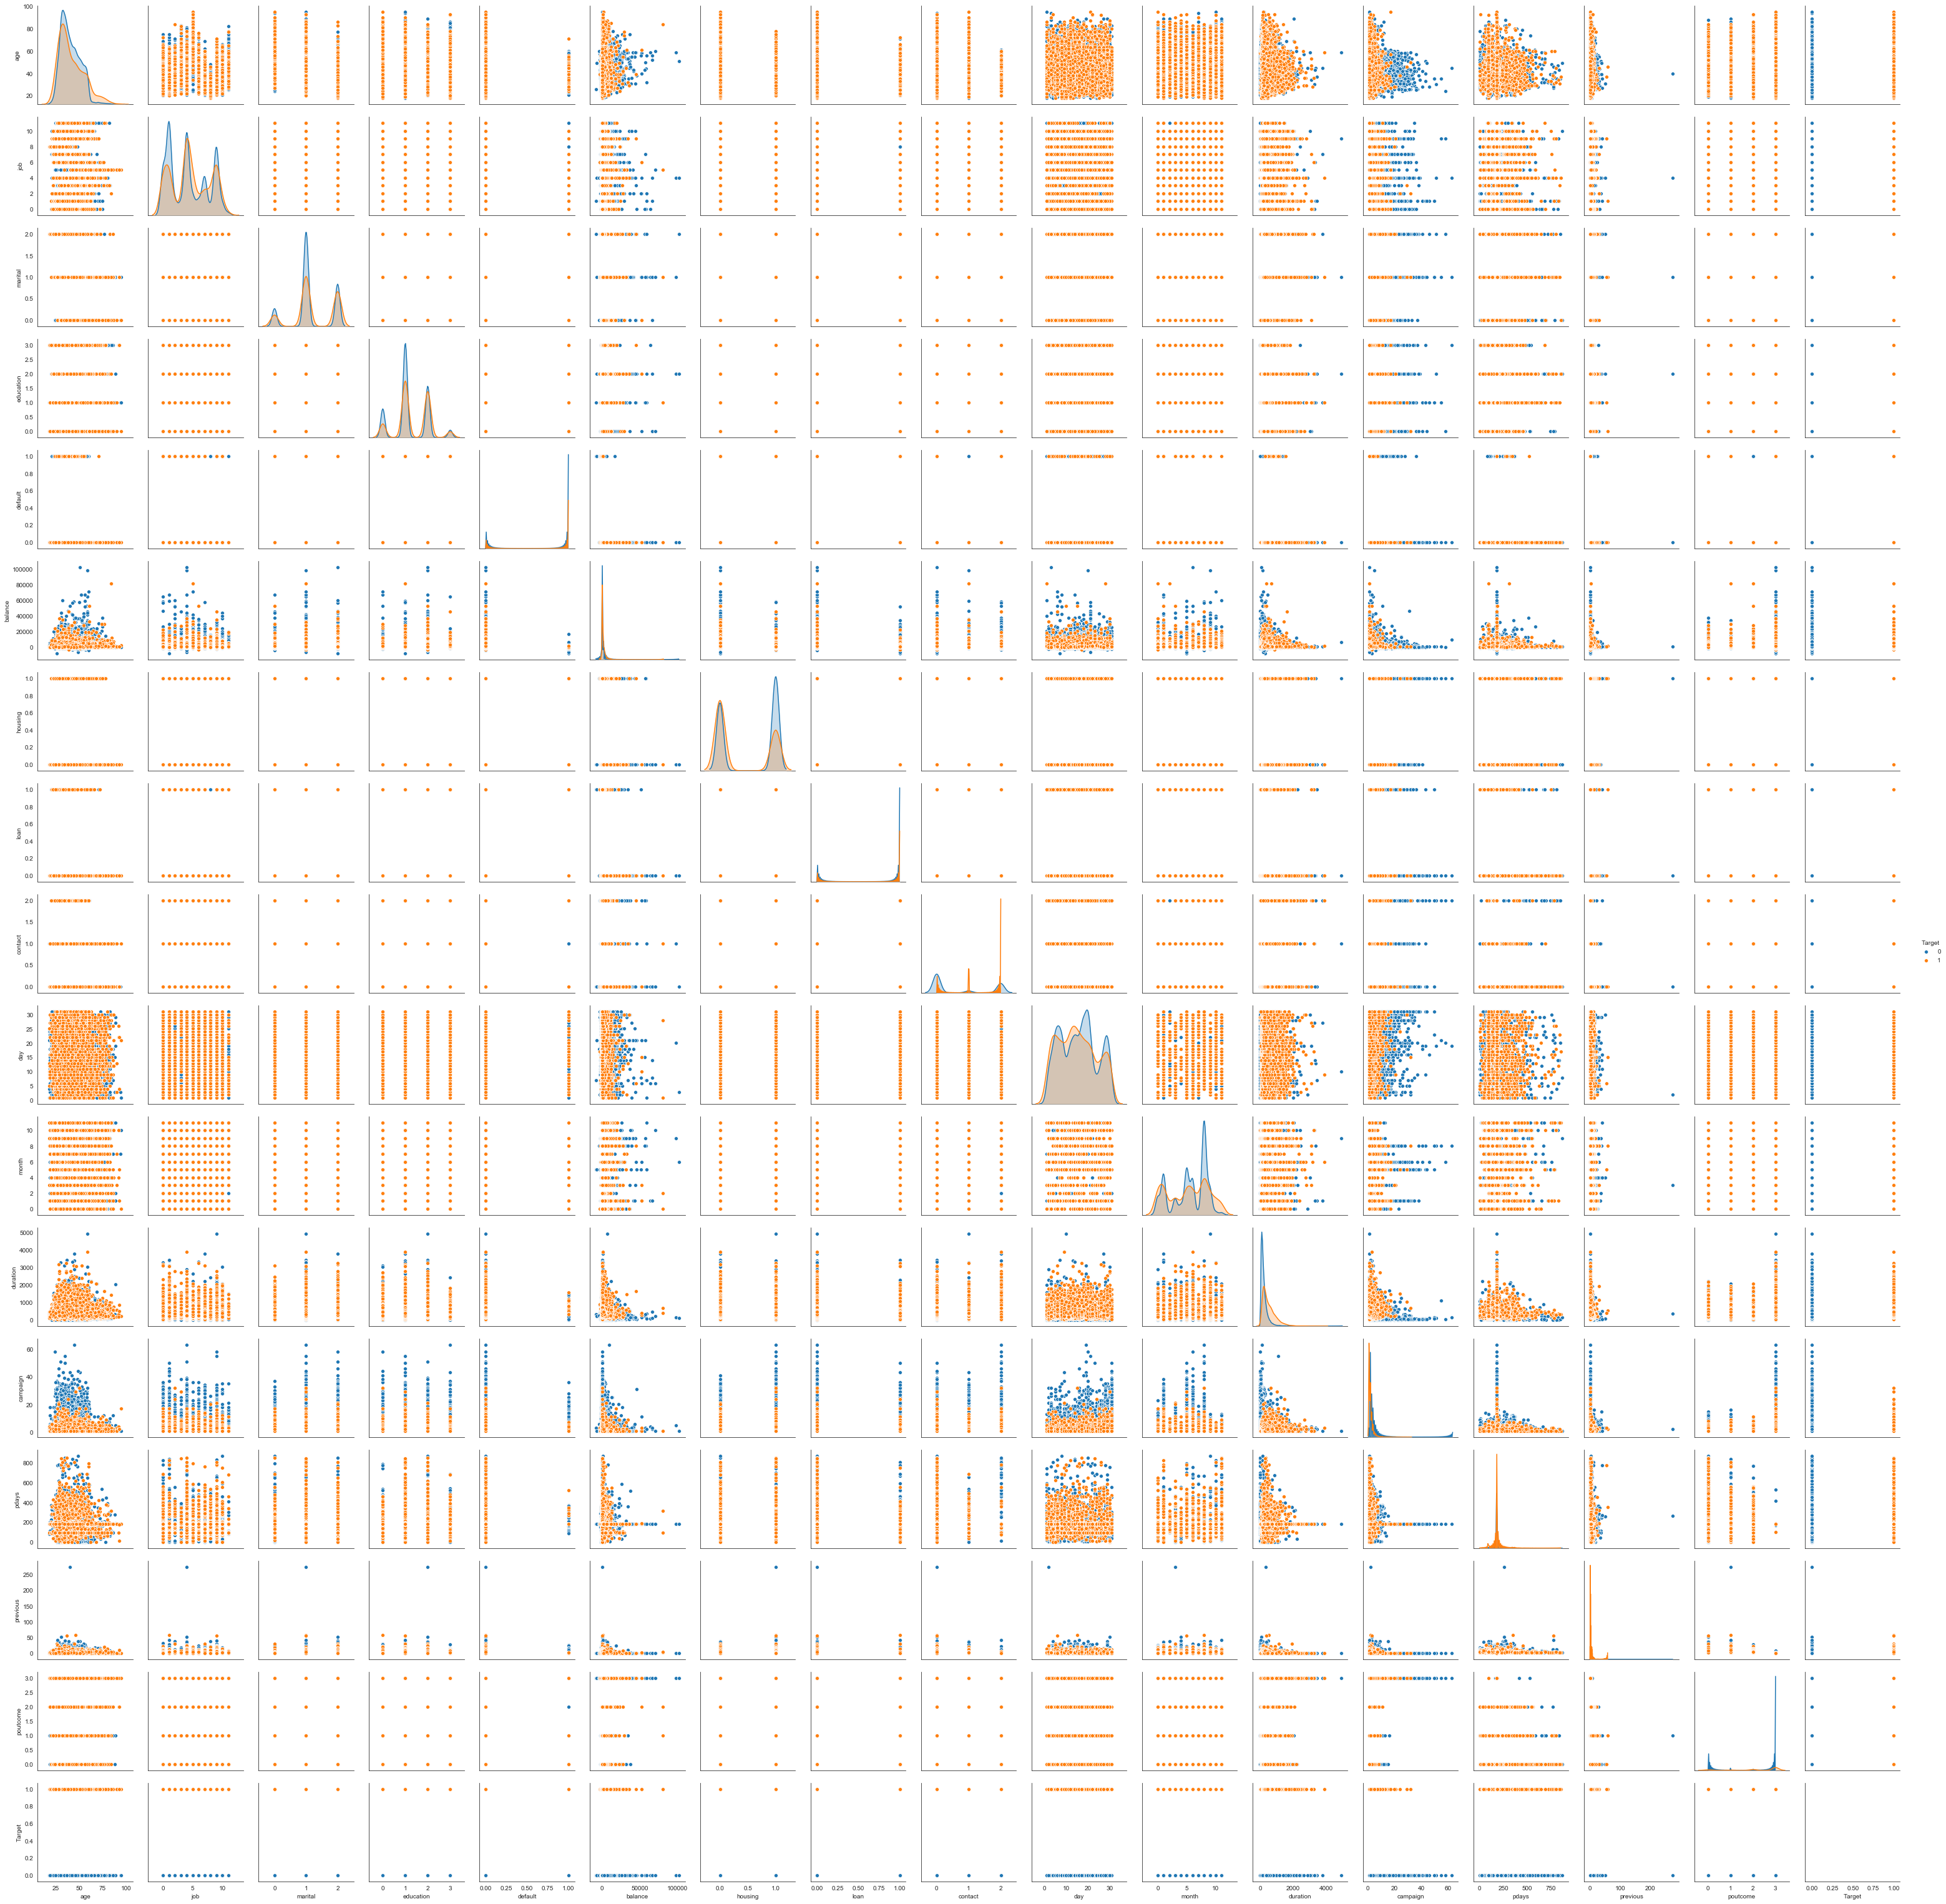

In [245]:
# Plotting pairplot to study the distribution
sns.pairplot(bank_df, hue = 'Target') 

In [362]:
# Dropping duration as a real predictive model should not rely on the call duration (after which we anyway know whether the
# user will take the subscription or not).
bank_df = bank_df.drop(['duration'], axis=1)

In [363]:
# Checking distribution of target variable
bank_df['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [364]:
# Preparing train and test data
X = bank_df.drop("Target", axis=1)
y = bank_df["Target"]
test = 0.3
seed = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = seed)

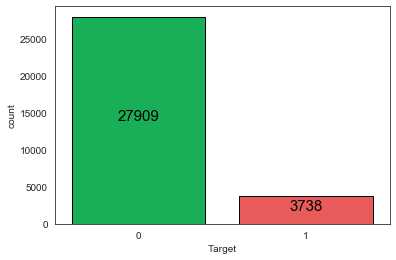

In [365]:
# Printing the bars with counts for target column to study the distribution
plot = sns.countplot(y_train, edgecolor = 'black', palette = [ '#00C851','#ff4444'])
bars = plot.patches
plot.annotate(bars[0].get_height(), (0, bars[0].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')
plot.annotate(bars[1].get_height(), (1, bars[1].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')
plt.show()

In [366]:
# The 1s are way too low, it is an extreme case of target imbalance, thus upsampling the 1s by 10000 to convert the ratio
# of 0s and 1s to almost 2:1
extra_samples = y_train[y_train == 1].sample(10000, random_state = 1, replace=True).index   
X_train = pd.concat([X_train, X_train.loc[extra_samples, :]])  
y_train = pd.concat([y_train, y_train.loc[extra_samples]])   
X_train.shape, y_train.shape

((41647, 15), (41647,))

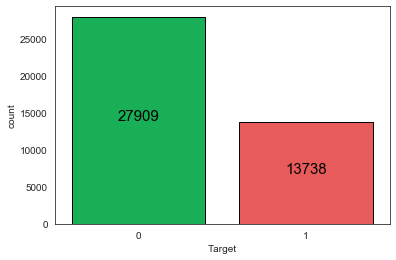

In [367]:
# Printing the bars with counts for target column again to study the distribution after upsampling
plot = sns.countplot(y_train, edgecolor = 'black', palette = [ '#00C851','#ff4444'])
bars = plot.patches
plot.annotate(bars[0].get_height(), (0, bars[0].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')
plot.annotate(bars[1].get_height(), (1, bars[1].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')
plt.show()

In [368]:
# Scaling the predictors
def scale(train, test):
    scaler = StandardScaler()
    scaler.fit(train)
    scaled_train = scaler.transform(train)
    scaled_test = scaler.transform(test)
    return scaled_train, scaled_test

X_train, X_test = scale(X_train, X_test)

In [254]:
# Answer 5

# Support Vector Classifier
# Building a Support Vector Machine on train data
svc_model = SVC(C=100, gamma=0.001)
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)

# Printing the model score and confusion matrix
print(svc_model.score(X_test, y_test))
print(metrics.confusion_matrix(prediction,y_test))

0.8709820112061338
[[11326  1063]
 [  687   488]]


In [369]:
# Decision Tree

# Building a decision tree model on train data
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt_model.fit(X_train, y_train)
prediction = dt_model.predict(X_test)

# Printing the model score and confusion matrix
print(dt_model.score(X_test, y_test))
print(metrics.confusion_matrix(prediction,y_test))

0.8746682394573873
[[11203   890]
 [  810   661]]


In [370]:
# KNN

# Building the KNN model on train data
knn_model = KNeighborsClassifier(n_neighbors=29)
knn_model.fit(X_train, y_train)
predicted_labels = knn_model.predict(X_test)

# Printing the model score and confusion matrix
print(knn_model.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, predicted_labels))

0.8398702447655558
[[10770  1243]
 [  929   622]]


In [371]:
# Logistic Regression

# Building the Logistic Regression model on train data
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_predict = log_model.predict(X_test)

# Printing the model score and confusion matrix
print(log_model.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.8403125921557063
[[10887  1126]
 [ 1040   511]]


C:\Users\Aayushi Somani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [372]:
# To find various scores for all the above models
def fit_n_print(model, X_train, X_test, y_train, y_test):  
    model.fit(X_train, y_train)   # Fit the model with the train data
    pred = model.predict(X_test)  # Make predictions on the test set
    score = round(model.score(X_test, y_test), 3)   # Compute accuracy score for test set
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  # Compute the confusion matrix 
    recall = round(tp/(tp+fn), 3)   
    precision = round(tp/(tp+fp), 3)  
    specificity =round(tn/(tn+fp),3) 
    f1_score =  round(2*precision*recall/(precision + recall), 3)
    return score, recall, precision, specificity, f1_score  # Return all the metrics

In [373]:
result = pd.DataFrame(columns = ['score', 'recall', 'precision', 'specificity', 'f1_score'])

# Storing the results for each model
for model, model_name in zip([svc_model, knn_model, dt_model, log_model], 
                             ['Support Vector Classifier', 'KNN', 'Decision Tree', 'Logistic Regression']):
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)
    
result

C:\Users\Aayushi Somani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,score,recall,precision,specificity,f1_score
Support Vector Classifier,0.871,0.315,0.415,0.943,0.358
KNN,0.840,0.401,0.334,0.897,0.364
Decision Tree,0.875,0.426,0.449,0.933,0.437
Logistic Regression,0.840,0.329,0.312,0.906,0.320


In [374]:
# Decision Tree seems to the best performer in this case.

# Even though SVC has a good overall score of 0.871, its recall is the lowest! It won't generalize well on new data.

# Logistic Regression has good overall score but both precision and recall factor is lower than decision tree.

# KNN has a better recall than SVC but its precision is worse than the latter.

# SVC has the highest specificity, can be used in cases where that is more important than having a better recall.

# The f1 score (weighted average of precision and recall) is best for decision tree.

In [216]:
# Answer 6

# Bagging
# Building a bagging model on train data
bgcl = BaggingClassifier(n_estimators=50, max_samples=0.7, oob_score=True)
bgcl = bgcl.fit(X, y)

# Printing the out-of-bag score
print(bgcl.oob_score_)

0.889761341266506


In [375]:
# Adaboosting

# Building an adaptive boosting model on train data
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50, random_state=1)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)

# Printing the model score and confusion matrix
print(abcl.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict, labels=[0, 1]))

0.871129460336184
[[11471   542]
 [ 1206   345]]


In [376]:
# GradientBoost

# Building a gradient boosting model on train data
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate=0.01, random_state=1, max_depth=5)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)

# Printing the model score and confusion matrix
print(gbcl.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict, labels=[0, 1]))

0.8914774402831024
[[11901   112]
 [ 1360   191]]


In [377]:
# RandomForest

# Building a random forest model on train data
# Tuned the hyperparameters using GridCV, using the values returned by best_params_
rfcl = RandomForestClassifier(n_estimators=1000, random_state=1, max_features=5, max_depth=12)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)

# Printing the model score and confusion matrix
print(rfcl.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict, labels=[0, 1]))

0.8816720731347685
[[11289   724]
 [  881   670]]


In [378]:
ensemble_result = pd.DataFrame(columns = ['score', 'recall', 'precision', 'specificity', 'f1_score'])

# Storing the results for each model
for model, model_name in zip([rfcl, bgcl, gbcl, abcl], ['Random Forest', 'Bagging', 'Gradient boosting', 'AdaBoosting']):
    ensemble_result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)
    
ensemble_result

,score,recall,precision,specificity,f1_score
Random Forest,0.882,0.432,0.481,0.940,0.455
Bagging,0.882,0.348,0.477,0.951,0.402
Gradient boosting,0.891,0.123,0.630,0.991,0.206
AdaBoosting,0.871,0.222,0.389,0.955,0.283


In [115]:
# Random Forest seems to be the best performer here.

# Gradient boosting has the best overall score, but least recall. It might not generalize well on new data!

# Gradient boosting has the highest precision. It suggests that the algo returned substantial relevant results than
# irrelevant ones.

# Random forest has the highest f1 score (weighted average of precision and recall). It is more important than just 
# precision in most cases.

# Bagging also performs almost as good as random forest, can be used in cases where higher specificity is more important
# than having a higher recall.

# Random Forest performs better than decision tree! Here we can conclude that ensemble technique over a decision tree model
# has performed better than individual decision tree model. 